## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import xgboost as xg
sns.set()
from sklearn.model_selection import train_test_split
import logging

In [2]:
logging.basicConfig(filename='development_logs.txt',
                    filemode='a',
                    format='%(asctime)s %(message)s',
                    datefmt="%Y-%m-%d %H:%M:%S")

## Read and analyse data

In [3]:
logging.warning("Reading Dataset...")

In [4]:
raw_data = pd.read_csv('concrete_data.csv')
data = raw_data

In [5]:
logging.warning("Successfully completed")

In [6]:
data.head(10)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [7]:
data.shape


(1030, 9)

In [8]:
logging.warning("Raw data shape: (1030,9)")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

#### Here we see that there is an extra space in "fine_aggregate" so we remove it.

In [12]:
logging.warning("Removing extra space...")

In [13]:
data=raw_data.rename({"fine_aggregate ":"fine_aggregate"},axis=1)

In [14]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

#### Here we define a function that shows the distribution of the features in the form of boxplot.

In [15]:
logging.warning("Analysing outliers...")

In [16]:
logging.warning("Initialising boxplot...")

In [17]:
logging.warning("Assigning dataframe...")

In [18]:
def outlier_graph(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))

/Applications/anaconda3/envs/myenv1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/envs/myenv1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/envs/myenv1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

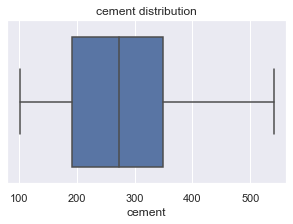

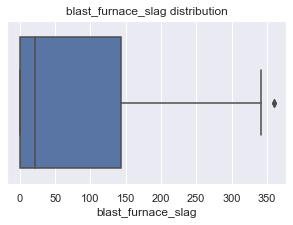

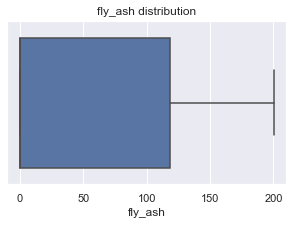

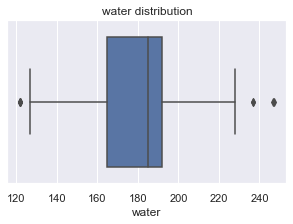

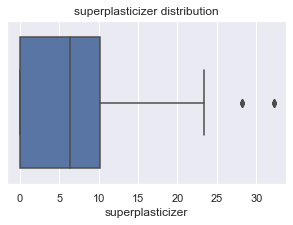

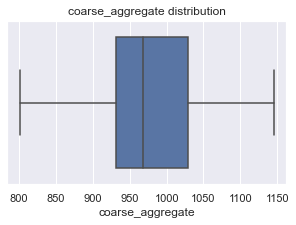

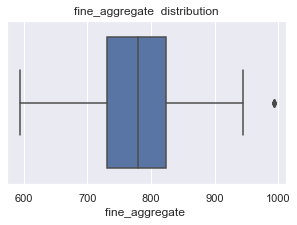

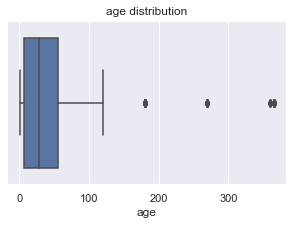

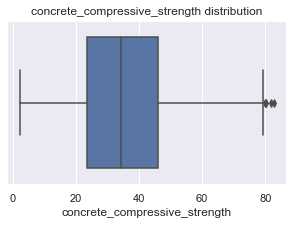

In [19]:
for i in raw_data.columns:
    outlier_graph(raw_data,i)

In [20]:
logging.warning("Successfully completed")

## A heatmap to analyse corellation between features and remove them if needed.

In [21]:
logging.warning("Heatmap to analyse correlation...")

In [22]:
logging.warning("Assigning dataframe to heatmap...")

<AxesSubplot:>

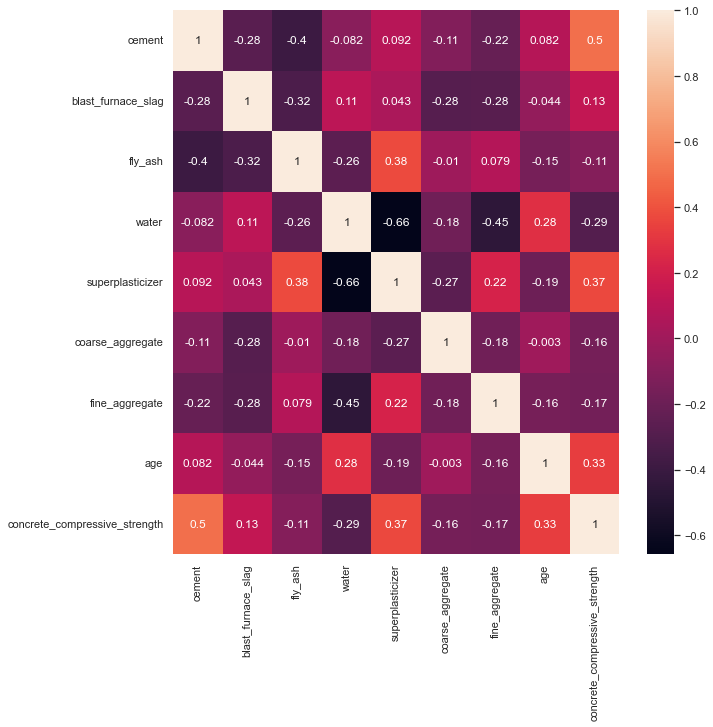

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [24]:
logging.warning("Successfully completed")

In [25]:
logging.warning("Dropping fly_ash and water attributes...")

In [26]:
data.drop(["fly_ash"],axis=1,inplace=True)

In [27]:
data.drop(["water"],axis=1,inplace=True)

In [28]:
logging.warning("Successfully completed")

In [29]:
data.head()

,cement,blast_furnace_slag,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,978.4,825.5,360,44.30


## Declare variables

In [30]:
logging.warning("Declaring variables...")

In [31]:
y = data['concrete_compressive_strength']
x=data.drop(['concrete_compressive_strength'],axis=1)

In [32]:
logging.warning("Successfully completed")

In [33]:
logging.warning("Scaling the inputs...")

## Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
inputs_scaled = scaler.transform(x)

In [35]:
logging.warning("Successfully completed")

## Train - test split

In [36]:
logging.warning("Splitting the dataset...")

In [37]:
train_X, test_X, train_y, test_y = train_test_split(inputs_scaled, y,
                      test_size = 0.3, random_state = 123)

In [38]:
logging.warning("Successfully completed")

## Import libraries for ML algorithms

In [39]:
logging.warning("Import libraries for ML algorithms...")

In [40]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [41]:
logging.warning("Successfully completed")

## Analysing results on 3 different algorithms

In [42]:
logging.warning("Analysing results on 3 different algorithms...")

In [43]:
Model_Names=["Linear Regression","Random Forest","Decision Tree"]
Scores=[]

In [44]:
lr=LinearRegression()
lr.fit(train_X,train_y)
y_head=lr.predict(test_X)
Scores.append(r2_score(test_y,y_head))

In [45]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(train_X,train_y)
y_head=rf.predict(test_X)
Scores.append(r2_score(test_y,y_head))

In [46]:
dt=DecisionTreeRegressor()
dt.fit(train_X,train_y)
y_head=dt.predict(test_X)
Scores.append(r2_score(test_y,y_head))

In [47]:
logging.warning("Successfully completed")

## Graphical representation of their scores

In [48]:
logging.warning("Graphical representation of their scores...")

<AxesSubplot:xlabel='Models', ylabel='Scores'>

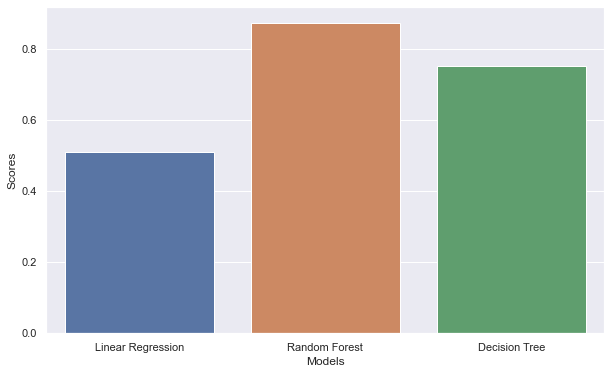

In [49]:
graph_data= pd.DataFrame(list(zip(Model_Names,Scores)),columns =['Models', 'Scores']) 
plt.figure(figsize=(10,6))
sns.barplot(x=graph_data["Models"],y=graph_data["Scores"])

In [50]:
logging.warning("Successfully completed")

In [51]:
logging.warning("Score: 0.8753783685089054")

In [52]:
Scores

[0.5114701330836169, 0.8753783685089054, 0.7526334839238806]

#### It seems that Random forest regressor yields most accurate results so we are going to use that.

In [53]:
logging.warning("Initialising random forest regressor...")

In [54]:
regr = RandomForestRegressor()

In [55]:
logging.warning("Fitting train-test data...")

In [56]:
regr.fit(train_X,train_y)

RandomForestRegressor()

In [57]:
logging.warning("Predicting test data...")

In [58]:
predictions=regr.predict(test_X)

## Comapring predictions with actual results

In [59]:
logging.warning("Comapring predictions with actual results...")

In [60]:
logging.warning("Implimentng scatterplot...")

/Applications/anaconda3/envs/myenv1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


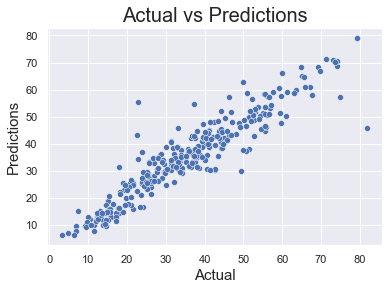

Score : 0.8753783685089054


In [61]:
sns.scatterplot(test_y,predictions)
plt.title('Actual vs Predictions',fontsize = 20)
plt.xlabel('Actual',size=15)
plt.ylabel('Predictions',size=15)
plt.show()
print("Score : "+str(Scores[1]))

In [62]:
logging.warning("Successfully completed")

/Applications/anaconda3/envs/myenv1/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/envs/myenv1/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


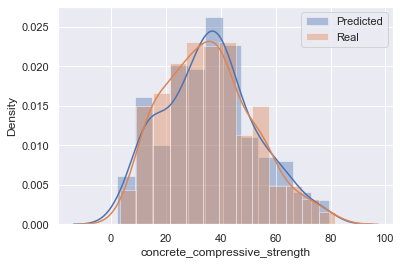

In [63]:
sns.distplot(y_head,label="Predicted")
sns.distplot(test_y,label="Real")
plt.legend()

#### Not the best model out there but seems workable.

## Manual testing

In [64]:
logging.warning("Manual testing...")

In [65]:
data.head()

,cement,blast_furnace_slag,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,978.4,825.5,360,44.30


In [66]:
logging.warning("Assigning manual input...")

In [67]:
inp = [332,142,0,930,595,365]

In [68]:
logging.warning("Predicting manual input...")

In [69]:
regr.predict([inp])

array([63.4809])

In [70]:
logging.warning("Successfully completed")

## Pickling the model

In [71]:
logging.warning("Pickling the model...")

In [72]:
import pickle
pickle_out = open("strength.pkl","wb")
pickle.dump(regr, pickle_out)
pickle_out.close()

In [73]:
logging.warning("Successfully completed")